### data5数据

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [34]:
dataset = pd.read_csv('data/data5.csv',engine='python')

In [35]:
dataset

,GM风机II回,data
0,70500888,NaN
1,70501032,144.0
2,70501104,72.0
3,70501320,216.0
4,70501464,144.0
...,...,...
145,70523496,144.0
146,70523640,144.0
147,70523856,216.0
148,70523928,72.0


In [36]:
dataset = dataset.fillna(0)
dataset

,GM风机II回,data
0,70500888,0.0
1,70501032,144.0
2,70501104,72.0
3,70501320,216.0
4,70501464,144.0
...,...,...
145,70523496,144.0
146,70523640,144.0
147,70523856,216.0
148,70523928,72.0


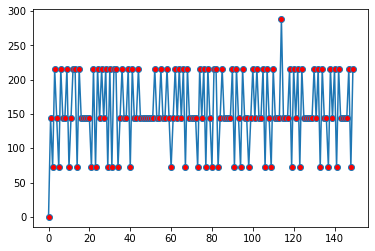

In [37]:
plt.plot(list(range(0,150)),dataset["data"],marker='o',markerfacecolor="r")

In [38]:
#set variable
rs = np.random.RandomState(169)
lendata = dataset.shape[0]
outliers_fraction = 0.03
test_data = []
anomaly = []

In [39]:
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a, b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

In [40]:
#read dataset x,y
x = normalize(pd.DataFrame(dataset, columns=["data"]),-1,1)

In [41]:
ifm = IsolationForest(n_estimators=100,verbose=2,n_jobs=2,max_samples=lendata,random_state=rs,max_features=1)

In [42]:
ifm.fit(x)

Building estimator 1 of 50 for this parallel run (total 100)...Building estimator 1 of 50 for this parallel run (total 100)...

Building estimator 2 of 50 for this parallel run (total 100)...Building estimator 2 of 50 for this parallel run (total 100)...

Building estimator 3 of 50 for this parallel run (total 100)...Building estimator 3 of 50 for this parallel run (total 100)...

Building estimator 4 of 50 for this parallel run (total 100)...Building estimator 4 of 50 for this parallel run (total 100)...

Building estimator 5 of 50 for this parallel run (total 100)...Building estimator 5 of 50 for this parallel run (total 100)...

Building estimator 6 of 50 for this parallel run (total 100)...Building estimator 6 of 50 for this parallel run (total 100)...

Building estimator 7 of 50 for this parallel run (total 100)...Building estimator 7 of 50 for this parallel run (total 100)...

Building estimator 8 of 50 for this parallel run (total 100)...Building estimator 8 of 50 for this paral

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


IsolationForest(max_features=1, max_samples=150, n_jobs=2,
                random_state=RandomState(MT19937) at 0x7FD1BA051240, verbose=2)

In [43]:
scores_pred = ifm.decision_function(x)

In [44]:
scores_pred

array([-0.35201686,  0.05369704, -0.02520192,  0.02332532,  0.05369704,
       -0.02520192,  0.02332532,  0.05369704,  0.05369704,  0.02332532,
       -0.02520192,  0.05369704,  0.02332532,  0.02332532, -0.02520192,
        0.02332532,  0.05369704,  0.05369704,  0.05369704,  0.05369704,
        0.05369704, -0.02520192,  0.02332532, -0.02520192,  0.02332532,
        0.05369704,  0.02332532,  0.05369704,  0.02332532, -0.02520192,
        0.02332532, -0.02520192,  0.02332532,  0.02332532, -0.02520192,
        0.05369704,  0.02332532,  0.05369704,  0.05369704,  0.02332532,
       -0.02520192,  0.02332532,  0.05369704,  0.05369704,  0.02332532,
        0.05369704,  0.05369704,  0.05369704,  0.05369704,  0.05369704,
        0.05369704,  0.05369704,  0.02332532,  0.05369704,  0.05369704,
        0.02332532,  0.05369704,  0.05369704,  0.02332532,  0.05369704,
       -0.02520192,  0.05369704,  0.02332532,  0.05369704,  0.02332532,
        0.05369704,  0.02332532, -0.02520192,  0.02332532,  0.05

In [45]:
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

In [46]:
threshold

-0.025201923547723326

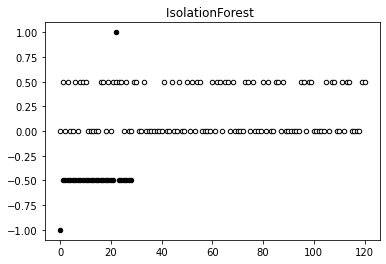

In [47]:
plt.title("IsolationForest ")
for i in scores_pred:
    if i <= threshold:
        #print(i)
        test_data.append(1)
        anomaly.append(i)
    else:
        test_data.append(0)
        
ano_lable = np.column_stack(((dataset['GM风机II回'],dataset['data'],x,scores_pred, test_data)))
df = pd.DataFrame(data=ano_lable, columns=['GM风机II回','data','x', 'IsoFst_Score','label'])

b = plt.scatter(list(range(0,121)),df['x'][df['label'] == 0], s=20, edgecolor='k',c='white')
c = plt.scatter(list(range(0,29)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [48]:
ano_lable = np.column_stack(((df['GM风机II回'],df['data'],x,scores_pred, test_data)))

In [49]:
df = pd.DataFrame(data=ano_lable, columns=['GM风机II回','data','x', 'IsoFst_Score','label'])

In [50]:
df

,GM风机II回,data,x,IsoFst_Score,label
0,70500888.0,0.0,-1.0,-0.352017,1.0
1,70501032.0,144.0,0.0,0.053697,0.0
2,70501104.0,72.0,-0.5,-0.025202,1.0
3,70501320.0,216.0,0.5,0.023325,0.0
4,70501464.0,144.0,0.0,0.053697,0.0
...,...,...,...,...,...
145,70523496.0,144.0,0.0,0.053697,0.0
146,70523640.0,144.0,0.0,0.053697,0.0
147,70523856.0,216.0,0.5,0.023325,0.0
148,70523928.0,72.0,-0.5,-0.025202,1.0


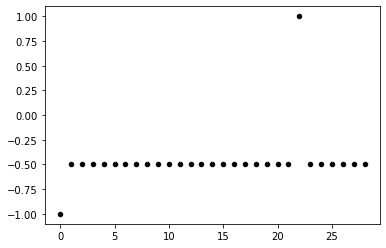

In [51]:
c = plt.scatter(list(range(0,29)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [52]:
print("孤立森林阈值  ：",threshold)
print("全量数据样本数：",len(dataset),"个")
print("检测异常样本数：",len(anomaly),"个")

孤立森林阈值  ： -0.025201923547723326
全量数据样本数： 150 个
检测异常样本数： 29 个
